In [1309]:
#MNIST - Hello World for ML
import numpy as np
import urllib
import gzip
import pickle
import os
import matplotlib.pyplot as plt

class MnistData:
    image_size = 28*28
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'https://jrkwon.com/data/ece5831/mnist/'

    file_name = key_file['train_images']
    file_path = url_base + file_name

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images':  't10k-images-idx3-ubyte.gz',
        'test_labels':  't10k-labels-idx1-ubyte.gz'
    }
    
    def __init__(self, image_size):
        self.image_size = image_size
        self.url_base = 'https://jrkwon.com/data/ece5831/mnist/'

    def softmax(self, a):
        return np.exp(a) / np.sum(np.exp(a))

    def softmax_modified(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a / np.sum(exp_a)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)
        return images

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def download(self, file_name):
        file_path = os.path.join(dataset_dir, file_name)

        if os.path.exists(file_path):
            print(f'File: {file_name} already exists')
            return

        print(f'Downloading {file_name}...')
        urllib.request.urlretrieve(self.url_base + file_name, file_path)

    def _download_all(self):
        for file_name in key_file.values():
            self.download(file_name)

    def change_one_hot_label(self, y, num_class, idx):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t

    def _create_dataset(self, key_file, dataset_dir, dataset_pkl, file_name1, file_name2, file_name3, file_name4):
        dataset = {}
        dataset[file_name1] = self._load_images(os.path.join(dataset_dir, key_file[file_name1]))
        dataset[file_name2] = self._load_labels(os.path.join(dataset_dir, key_file[file_name2]))
        dataset[file_name3] = self._load_images(os.path.join(dataset_dir, key_file[file_name3]))
        dataset[file_name4] = self._load_labels(os.path.join(dataset_dir, key_file[file_name4]))

        with open(os.path.join(dataset_dir, dataset_pkl), 'wb') as f:  # Change to 'wb'
            print(f'Pickle: {dataset_dir}/{dataset_pkl} is being created.')
            pickle.dump(dataset, f)
        
        return dataset

    def init_dataset(self, key_file, dataset_dir, dataset_pkl, file_name1, file_name2, file_name3, file_name4):
        self._download_all()
        if os.path.exists(os.path.join(dataset_dir, dataset_pkl)):
            with open(os.path.join(dataset_dir, dataset_pkl), 'rb') as f:
                dataset = pickle.load(f) 
        else:
            dataset = self._create_dataset(key_file, dataset_dir, dataset_pkl, file_name1, file_name2, file_name3, file_name4)
        
        return dataset



In [1310]:
#image_size = 28*28
#myMnistData = MnistData(image_size=image_size)

#url_base = 'https://jrkwon.com/data/ece5831/mnist/'
#dataset_dir = 'dataset'

#key_file = {
#    'train_images': 'train-images-idx3-ubyte.gz',
#    'train_labels': 'train-labels-idx1-ubyte.gz',
#    'test_images':  't10k-images-idx3-ubyte.gz',
#    'test_labels':  't10k-labels-idx1-ubyte.gz'
#}

#file_name = key_file['train_images']
#file_path = url_base + file_name

#dataset_pkl = 'mnist.pkl'

images = myMnistData._load_images(dataset_dir + '/' + key_file['test_images'])
images.shape

(10000, 784)

In [1311]:
a = np.array([10, 20, 30])
s = softmax(a)

In [1312]:
#how about 900, 1000

a = np.array([900, 1000])
s = softmax(a)

C:\Users\Alex\AppData\Local\Temp\ipykernel_3508\303232154.py:4: RuntimeWarning: overflow encountered in exp
  return np.exp(a)/np.sum(np.exp(a))
C:\Users\Alex\AppData\Local\Temp\ipykernel_3508\303232154.py:4: RuntimeWarning: invalid value encountered in divide
  return np.exp(a)/np.sum(np.exp(a))


In [1313]:
a = np.array([900, 1000])
s = softmax_modified(a)

s

array([3.72007598e-44, 1.00000000e+00])

In [1314]:
a = np.array([800, 1100])
s = softmax_modified(a)

s

array([5.14820022e-131, 1.00000000e+000])

In [1315]:
a = np.array([700, 1200])
s = softmax_modified(a)

s

array([7.12457641e-218, 1.00000000e+000])

In [1316]:
#testing key_file

key_file['train_images']

'train-images-idx3-ubyte.gz'

In [1317]:
#Downloading a file

file_name = key_file['train_images']
file_path = url_base + file_name
#urlretrieve gets an error message
#urllib.request.urlretrieve(file_path, dataset_dir + '/' + file_name)

In [1318]:
#testing download_all
myMnistData._download_all()


File: train-images-idx3-ubyte.gz already exists
File: train-labels-idx1-ubyte.gz already exists
File: t10k-images-idx3-ubyte.gz already exists
File: t10k-labels-idx1-ubyte.gz already exists


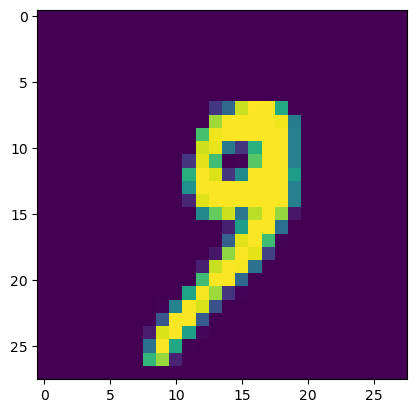

In [1319]:
idx = 1000

a = images[idx].reshape(28, 28)
plt.imshow(a)

In [1320]:
labels = myMnistData._load_labels(f'{dataset_dir}/{key_file['test_labels']}')
labels[idx]

9

In [1321]:
mnist_data_base = 'mnist/'

dataset = myMnistData._create_dataset(key_file, dataset_dir, dataset_pkl, 'train_images', 'train_labels', 'test_images', 'test_labels')

dataset['train_images'][idx]

Pickle: dataset/mnist.pkl is being created.


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36, 146,
       254, 255, 251,  95,   6,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

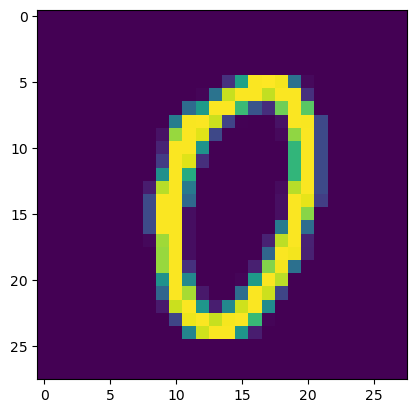

In [1322]:
img = dataset['train_images'][idx].reshape(28, 28)
plt.imshow(img)

In [1323]:
dataset = myMnistData.init_dataset(key_file, dataset_dir, dataset_pkl, 'train_images', 'train_labels', 'test_images', 'test_labels')


dataset = myMnistData._create_dataset(key_file, dataset_dir, dataset_pkl, 'train_images', 'train_labels', 'test_images', 'test_labels')

dataset['test_images'].shape

File: train-images-idx3-ubyte.gz already exists
File: train-labels-idx1-ubyte.gz already exists
File: t10k-images-idx3-ubyte.gz already exists
File: t10k-labels-idx1-ubyte.gz already exists
Pickle: dataset/mnist.pkl is being created.


(10000, 784)

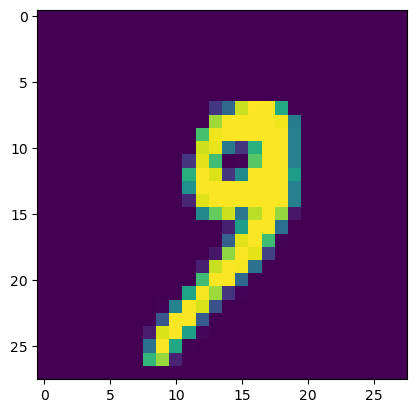

In [1324]:
plt.imshow(dataset['test_images'][idx].reshape(28, 28))

In [1325]:
print(f'Label: {dataset['test_labels'][idx]}')

Label: 9


In [1326]:
y = np.array([1, 0, 9, 8])
one_hot_y = myMnistData.change_one_hot_label(y, 10, idx)
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
